Огляньте структуру датасету (Animals-10):

● визначте кількість класів (навчальна множина / тестова) - 10 класів

● виділіть тестову/валідаційну множину - 15%/15%

● структуру каталогів (папок) - 10 папок (у кожній власна тварина)

● ознайомтеся з форматом файлів - .jpeg

In [1]:
import os
import shutil
from sklearn.model_selection import train_test_split

data_dir = r"C:\Users\іванна\Downloads\Animals-10\raw-img"
train_dir = r"C:\Users\іванна\Downloads\Animals-10\train"
validation_dir = r"C:\Users\іванна\Downloads\Animals-10\validation"
test_dir = r"C:\Users\іванна\Downloads\Animals-10\test"

for directory in [train_dir, validation_dir, test_dir]:
    if not os.path.exists(directory):
        os.makedirs(directory)

for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)

    if os.path.isdir(class_path):
        files = os.listdir(class_path)

        # навчальна (70%), валідаційна (15%) та тестова (15%) множини
        train_files, temp_files = train_test_split(files, test_size=0.3, random_state=42)  # 70% train, 30% for val + test
        val_files, test_files = train_test_split(temp_files, test_size=0.5, random_state=42)  # 50% of the 30% for validation, 50% for test

        train_class_dir = os.path.join(train_dir, class_name)
        val_class_dir = os.path.join(validation_dir, class_name)
        test_class_dir = os.path.join(test_dir, class_name)

        for directory in [train_class_dir, val_class_dir, test_class_dir]:
            if not os.path.exists(directory):
                os.makedirs(directory)

        for file in train_files:
            shutil.move(os.path.join(class_path, file), os.path.join(train_class_dir, file))

        for file in val_files:
            shutil.move(os.path.join(class_path, file), os.path.join(val_class_dir, file))

        for file in test_files:
            shutil.move(os.path.join(class_path, file), os.path.join(test_class_dir, file))


In [2]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

train_dir = r"C:\Users\іванна\Downloads\Animals-10\train"
val_dir = r"C:\Users\іванна\Downloads\Animals-10\validation"
test_dir = r"C:\Users\іванна\Downloads\Animals-10\test"

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
val_dataset = datasets.ImageFolder(root=val_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

for images, labels in train_loader:
    print(images.shape)
    break


torch.Size([64, 3, 128, 128])


З аугментацією:

In [ ]:
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(30),
    transforms.RandomResizedCrop(128, scale=(0.8, 1.0)),
    transforms.ToTensor(),
])

val_transform = transforms.Compose([
    transforms.Resize(128),
    transforms.CenterCrop(128),
    transforms.ToTensor(),
])

train_dataset = datasets.ImageFolder(root=train_dir, transform=train_transform)
val_dataset = datasets.ImageFolder(root=validation_dir, transform=val_transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=val_transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

['elefante', 'farfalla', 'mucca', 'gallina', 'gatto', 'cavallo', 'pecora', 'scoiattolo', 'cane', 'ragno']


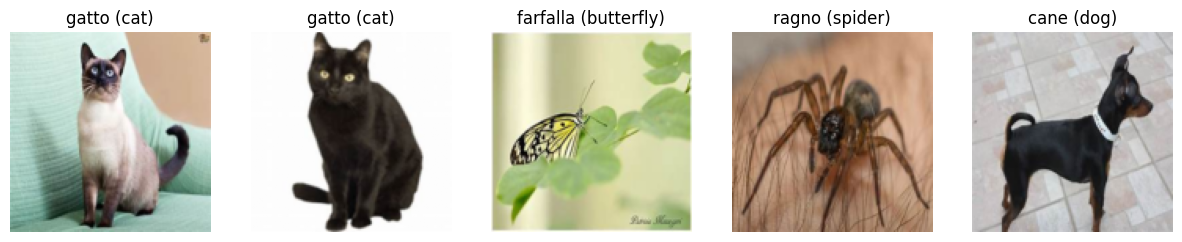

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def show_images_from_classes(data_loader, num_images=5):
    data_iter = iter(data_loader)
    images, labels = next(data_iter)
    train_dir = "/content/drive/MyDrive/train"
    class_names = os.listdir(train_dir)
    class_names1 = ['cane (dog)',  'cavallo (horse)', 'elefante (elephant)', 'farfalla (butterfly)',  'gallina (chicken)', 'gatto (cat)', 'mucca (cow)', 'pecora (sheep)', 'ragno (spider)', 'scoiattolo (squirrel)']
    print(class_names)
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    for i in range(num_images):
        ax = axes[i]
        image = images[i].numpy().transpose((1, 2, 0))
        image = np.clip(image, 0, 1)
        ax.imshow(image)
        ax.set_title(f"{class_names1[labels[i].item()]}")
       # ax.set_title(f"Class: {labels[i].item()}")
        ax.axis('off')

    plt.show()

show_images_from_classes(train_loader, num_images=5)

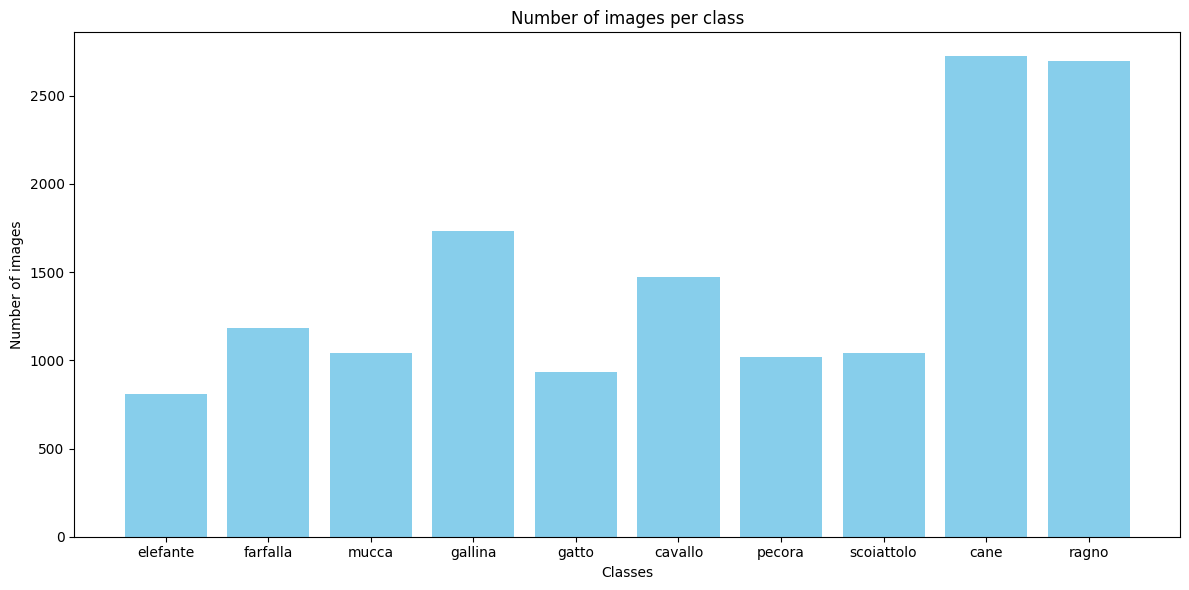

In [ ]:
import os
import matplotlib.pyplot as plt

train_dir = "/content/drive/MyDrive/train"
class_names = os.listdir(train_dir)
class_names1 = ['cane (dog)',  'cavallo (horse)', 'elefante (elephant)', 'farfalla (butterfly)',  'gallina (chicken)', 'gatto (cat)', 'mucca (cow)', 'pecora (sheep)', 'ragno (spider)', 'scoiattolo (squirrel)']

image_counts = []

for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        image_counts.append(len(os.listdir(class_path)))

plt.figure(figsize=(12, 6))
plt.bar(class_names, image_counts, color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Number of images')
plt.title('Number of images per class')
plt.tight_layout()
plt.show()


In [68]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5, padding=2)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5, padding=2)
        self.conv3 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.bn1 = nn.BatchNorm2d(64)
        self.bn2 = nn.BatchNorm2d(128)
        self.bn3 = nn.BatchNorm2d(256)

        self.fc1 = nn.Linear(256 * 16 * 16, 1024)
        self.fc2 = nn.Linear(1024, 10)

        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

        self.dropout = nn.Dropout(p=0.3)

    def forward(self, x):
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.pool(x)

        x = self.relu(self.bn2(self.conv2(x)))
        x = self.pool(x)

        x = self.relu(self.bn3(self.conv3(x)))
        x = self.pool(x)

        x = x.view(-1, 256 * 16 * 16)

        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)

        return self.softmax(x)

In [69]:
def initialize_model():
    model = SimpleCNN()
    model.to(device)
    class_counts = torch.tensor([800, 1200, 1000, 1700, 1000, 1500, 1000, 1000, 2700, 2700])
    total_images = class_counts.sum()
    class_weights = total_images / class_counts
    class_weights_tensor = class_weights.float().to(device)
    #class_weights = 1. / class_counts
    #weights = class_weights[labels]
    #criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.001)
    return model, criterion, optimizer

In [70]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

train_dir = r"C:\Users\іванна\Downloads\Animals-10\train"
val_dir = r"C:\Users\іванна\Downloads\Animals-10\validation"
test_dir = r"C:\Users\іванна\Downloads\Animals-10\test"

train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
val_dataset = datasets.ImageFolder(root=val_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

In [71]:
model, criterion, optimizer = initialize_model()

In [9]:
print(torch.cuda.is_available())

False


In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
model.to(device)

Using device: cpu


SimpleCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=65536, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)

In [22]:
import math
num_images = len(train_loader.dataset)
batch_size = 64
num_batches = math.ceil(num_images / batch_size)
print(f"Кількість батчів: {num_batches}")

Кількість батчів: 287


In [77]:
import time

num_epochs = 3
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
train_f1_scores = []
val_f1_scores = []

for epoch in range(num_epochs):
    start_time = time.time()
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    all_labels_train = []
    all_preds_train = []

    for batch_idx, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)

        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
        all_labels_train.extend(labels.cpu().numpy())
        all_preds_train.extend(predicted.cpu().numpy())

        batch_accuracy = (predicted == labels).sum().item() / labels.size(0)
        batch_f1 = f1_score(labels.cpu().numpy(), predicted.cpu().numpy(), average='weighted')
        print(f"Epoch {epoch+1}/{num_epochs}, Batch {batch_idx}, Loss: {loss.item():.4f}, Accuracy: {batch_accuracy:.4f}, F1 Score: {batch_f1:.4f}")

    train_accuracy = correct_train / total_train
    train_f1 = f1_score(all_labels_train, all_preds_train, average='weighted')

    # Валідація
    model.eval()
    correct_val = 0
    total_val = 0
    all_labels_val = []
    all_preds_val = []
    val_loss = 0.0

    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()
            all_labels_val.extend(labels.cpu().numpy())
            all_preds_val.extend(predicted.cpu().numpy())

    val_accuracy = correct_val / total_val
    val_f1 = f1_score(all_labels_val, all_preds_val, average='weighted')

    train_losses.append(running_loss / len(train_loader))
    val_losses.append(val_loss / len(val_loader))
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    train_f1_scores.append(train_f1)
    val_f1_scores.append(val_f1)

    epoch_time = time.time() - start_time
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.4f}, Train F1: {train_f1_scores[-1]:.4f}")
    print(f"Epoch {epoch+1}/{num_epochs}, Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {val_accuracies[-1]:.4f}, Val F1: {val_f1_scores[-1]:.4f}")
    print(f"Time for Epoch {epoch+1}: {epoch_time:.2f} seconds")

Epoch 1/3, Batch 0, Loss: 2.2212, Accuracy: 0.2344, F1 Score: 0.1266
Epoch 1/3, Batch 1, Loss: 2.2581, Accuracy: 0.1719, F1 Score: 0.0809
Epoch 1/3, Batch 2, Loss: 2.1955, Accuracy: 0.2734, F1 Score: 0.1608
Epoch 1/3, Batch 3, Loss: 2.2324, Accuracy: 0.2188, F1 Score: 0.1127
Epoch 1/3, Batch 4, Loss: 2.2449, Accuracy: 0.1953, F1 Score: 0.0941
Epoch 1/3, Batch 5, Loss: 2.2125, Accuracy: 0.2266, F1 Score: 0.1298
Epoch 1/3, Batch 6, Loss: 2.2354, Accuracy: 0.2578, F1 Score: 0.1252
Epoch 1/3, Batch 7, Loss: 2.2058, Accuracy: 0.2422, F1 Score: 0.1361
Epoch 1/3, Batch 8, Loss: 2.2301, Accuracy: 0.2422, F1 Score: 0.1293
Epoch 1/3, Batch 9, Loss: 2.2209, Accuracy: 0.2578, F1 Score: 0.1389
Epoch 1/3, Batch 10, Loss: 2.2207, Accuracy: 0.2578, F1 Score: 0.1336
Epoch 1/3, Batch 11, Loss: 2.2008, Accuracy: 0.2734, F1 Score: 0.1695
Epoch 1/3, Batch 12, Loss: 2.2106, Accuracy: 0.2656, F1 Score: 0.1632
Epoch 1/3, Batch 13, Loss: 2.1864, Accuracy: 0.2969, F1 Score: 0.1797
Epoch 1/3, Batch 14, Loss: 2.2

In [78]:
torch.save(model.state_dict(), r'C:\Users\іванна\PycharmProjects\python-for-big-data-and-data-science\nn1\optimized_cnn_model.pth')

In [79]:
torch.save(model, 'full_model1.pth')

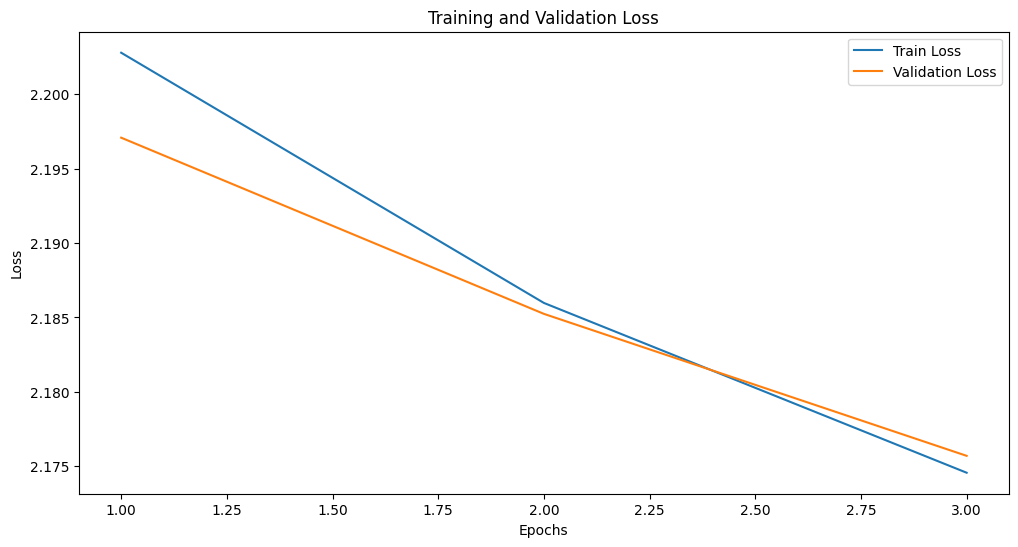

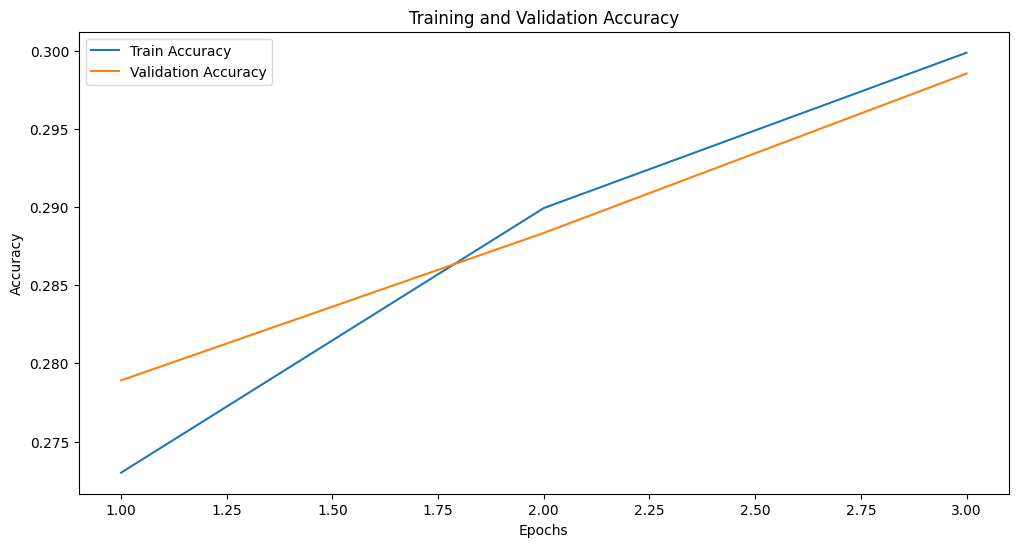

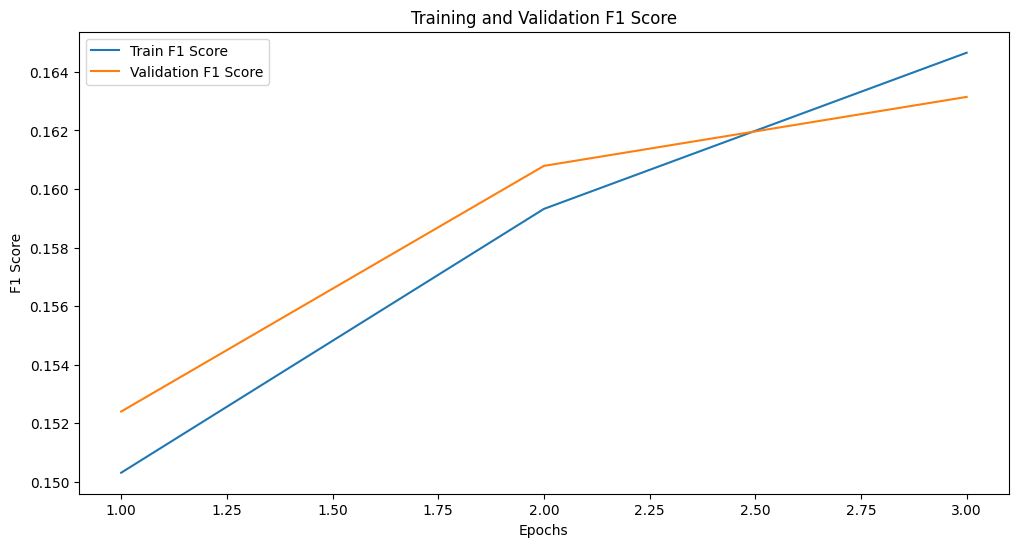

In [80]:
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(12, 6))
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(epochs, train_f1_scores, label='Train F1 Score')
plt.plot(epochs, val_f1_scores, label='Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.title('Training and Validation F1 Score')
plt.legend()
plt.show()

In [64]:
from sklearn.base import BaseEstimator
import torch
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score

class PyTorchClassifier(BaseEstimator):
    def __init__(self, model, criterion, optimizer_class, lr=0.001, dropout_rate=0.3, num_epochs=2, weight_init=None, activation_fn=None, batch_size=64):
        self.model = model
        self.criterion = criterion
        self.optimizer_class = optimizer_class
        self.lr = lr

        self.dropout_rate = dropout_rate
        self.num_epochs = num_epochs
        self.weight_init = weight_init
        self.activation_fn = activation_fn
        self.batch_size = batch_size

    def fit(self, X, y):
        self.model.to(device)
        optimizer = self.optimizer_class(self.model.parameters(), lr=self.lr)

        if self.weight_init:
            self.weight_init(self.model.conv1.weight)
            self.weight_init(self.model.conv2.weight)

        train_loader = DataLoader(TensorDataset(X, y), batch_size=self.batch_size, shuffle=True)

        for epoch in range(self.num_epochs):
            self.model.train()
            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = self.model(inputs.to(device))
                loss = self.criterion(outputs, labels.to(device))
                loss.backward()
                optimizer.step()

        return self

    def predict(self, X):
        self.model.eval()
        outputs = self.model(X.to(device))
        _, predicted = torch.max(outputs, 1)
        return predicted.cpu().numpy()

    def score(self, X, y):
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)


In [65]:
for inputs, labels in train_loader:
    X_train = inputs
    y_train = labels
    break

In [66]:
from sklearn.model_selection import GridSearchCV
lr = 0.001
optimizer_class = optim.SGD
dropout_rate = 0.3
activation_fn = torch.nn.ReLU()
batch_size = 128
param_grid = {
    'batch_size':[32, 64, 128, 256]
}

model = SimpleCNN()

clf = PyTorchClassifier(model=model, criterion=torch.nn.CrossEntropyLoss(), optimizer_class=optim.Adam)

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters found:  {'batch_size': 128}


In [46]:
import optuna
import torch.optim as optim

def objective(trial):
    lr = trial.suggest_loguniform('lr', 1e-5, 1e-1)
    optimizer_type = trial.suggest_categorical('optimizer', ['Adam', 'SGD'])

    model = SimpleCNN().to(device)
    if optimizer_type == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=lr)
    else:
        optimizer = optim.SGD(model.parameters(), lr=lr)

    criterion = nn.CrossEntropyLoss()


    for epoch in range(10):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train.to(device))
        loss = criterion(outputs, y_train.to(device))
        loss.backward()
        optimizer.step()

    accuracy = accuracy_score(y_train, model.predict(X_train))

    return accuracy


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)
print('Best trial:', study.best_trial.params)

[I 2025-04-16 23:53:51,745] A new study created in memory with name: no-name-fabfa26c-8347-4802-aa8b-a446097d2c3e
C:\Users\іванна\AppData\Local\Temp\ipykernel_14956\3127875364.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-5, 1e-1)  # Логарифмічний пошук для lr
[W 2025-04-16 23:54:24,253] Trial 0 failed with parameters: {'lr': 0.0006713640518798663, 'optimizer': 'SGD'} because of the following error: AttributeError("'SimpleCNN' object has no attribute 'predict'").
Traceback (most recent call last):
  File "C:\Users\іванна\PycharmProjects\python-for-big-data-and-data-science\nn1\.venv\lib\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\іванна\AppData\Local\Temp\ipykernel_14956\3127875364.py", line 29, in objective
   

AttributeError: 'SimpleCNN' object has no attribute 'predict'